# WeatherPy

---

## Prioject for submission

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 625


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# Define an empty list to fetch the weather data for each city
city_name = []
city_lat = []
city_lng = []
city_max_temp = []
city_humidity = []
city_clouds = []
city_wind = []
city_country = []
city_date = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
counter = 0
record_counter = 0
setcount = 1

# Loop through all the cities in our list to fetch weather data
for city in cities:
    counter += 1
    if (counter % 50 == 0):
        setcount += 1
        record_counter = 0
        print(setcount)
        print(record_counter)
        print(counter)
    record_counter += 1
    time.sleep(1) # pauses the program for 1 second
    
    print("processing Record " + str(record_counter) + " of Set " + str(setcount) + " | " + city)
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(query_url + city).json()
        
        # Parse and append out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_name.append(city_weather['name'])
        city_lat.append(city_weather['coord']['lat'])
        city_lng.append(city_weather['coord']['lon'])
        city_max_temp.append(city_weather['main']['temp_max'])
        city_humidity.append(city_weather['main']['humidity'])
        city_clouds.append(city_weather['clouds']['all'])
        city_wind.append(city_weather['wind']['speed'])
        city_country.append(city_weather["sys"]["country"])
        city_date.append(city_weather['dt'])
        
    except:
        print("City not found: " + city)
        pass
            
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

    

Beginning Data Retrieval     
-----------------------------
processing Record 1 of Set 1 | balkanabat
processing Record 2 of Set 1 | vaini
processing Record 3 of Set 1 | tiksi
processing Record 4 of Set 1 | batagay-alyta
processing Record 5 of Set 1 | albany
processing Record 6 of Set 1 | souillac
processing Record 7 of Set 1 | mar del plata
processing Record 8 of Set 1 | rikitea
processing Record 9 of Set 1 | cabo san lucas
processing Record 10 of Set 1 | norman wells
processing Record 11 of Set 1 | cherskiy
processing Record 12 of Set 1 | sentyabrskiy
City not found: sentyabrskiy
processing Record 13 of Set 1 | ribeira grande
processing Record 14 of Set 1 | punta arenas
processing Record 15 of Set 1 | inongo
processing Record 16 of Set 1 | ushuaia
processing Record 17 of Set 1 | hobart
processing Record 18 of Set 1 | pokhara
processing Record 19 of Set 1 | kruisfontein
processing Record 20 of Set 1 | kochevo
processing Record 21 of Set 1 | avarua
processing Record 22 of Set 1 | taola

processing Record 35 of Set 4 | praia
processing Record 36 of Set 4 | charleston
processing Record 37 of Set 4 | kautokeino
processing Record 38 of Set 4 | belmonte
processing Record 39 of Set 4 | bundaberg
processing Record 40 of Set 4 | gat
processing Record 41 of Set 4 | narsaq
processing Record 42 of Set 4 | attawapiskat
City not found: attawapiskat
processing Record 43 of Set 4 | manati
processing Record 44 of Set 4 | conakry
processing Record 45 of Set 4 | ust-tsilma
processing Record 46 of Set 4 | deputatskiy
processing Record 47 of Set 4 | impfondo
processing Record 48 of Set 4 | portland
processing Record 49 of Set 4 | northam
processing Record 50 of Set 4 | loiza
5
0
200
processing Record 1 of Set 5 | yafran
processing Record 2 of Set 5 | barentsburg
City not found: barentsburg
processing Record 3 of Set 5 | sungairaya
processing Record 4 of Set 5 | quang ngai
processing Record 5 of Set 5 | sabang
processing Record 6 of Set 5 | cascais
processing Record 7 of Set 5 | acapulco


processing Record 24 of Set 8 | paradwip
City not found: paradwip
processing Record 25 of Set 8 | inhambane
processing Record 26 of Set 8 | vila velha
processing Record 27 of Set 8 | lompoc
processing Record 28 of Set 8 | paamiut
processing Record 29 of Set 8 | katherine
processing Record 30 of Set 8 | magui
City not found: magui
processing Record 31 of Set 8 | pio xii
processing Record 32 of Set 8 | vostok
processing Record 33 of Set 8 | ukiah
processing Record 34 of Set 8 | vaitupu
City not found: vaitupu
processing Record 35 of Set 8 | arona
processing Record 36 of Set 8 | amapa
processing Record 37 of Set 8 | souris
processing Record 38 of Set 8 | neyshabur
processing Record 39 of Set 8 | kavieng
processing Record 40 of Set 8 | dingle
processing Record 41 of Set 8 | olafsvik
processing Record 42 of Set 8 | ji-parana
City not found: ji-parana
processing Record 43 of Set 8 | richards bay
processing Record 44 of Set 8 | kuytun
processing Record 45 of Set 8 | suifenhe
processing Record

processing Record 14 of Set 12 | tougue
processing Record 15 of Set 12 | progreso
processing Record 16 of Set 12 | guarapari
processing Record 17 of Set 12 | dombarovskiy
processing Record 18 of Set 12 | chatellerault
processing Record 19 of Set 12 | daru
processing Record 20 of Set 12 | lodja
processing Record 21 of Set 12 | gracac
processing Record 22 of Set 12 | rovinj
processing Record 23 of Set 12 | lovington
processing Record 24 of Set 12 | kapuskasing
processing Record 25 of Set 12 | crotone
processing Record 26 of Set 12 | tripoli
processing Record 27 of Set 12 | buraydah
processing Record 28 of Set 12 | stornoway
processing Record 29 of Set 12 | bagdarin
processing Record 30 of Set 12 | campbell river
processing Record 31 of Set 12 | monteagudo
processing Record 32 of Set 12 | blackfoot
processing Record 33 of Set 12 | chernyy yar
processing Record 34 of Set 12 | codrington
processing Record 35 of Set 12 | savannah bight
processing Record 36 of Set 12 | salisbury
processing Re

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame({"City":city_name,
                "Lat":city_lat,
                "Lng":city_lng,
                "Max Temp":city_max_temp,
                "Humidity":city_humidity,
                "Cloudiness":city_clouds,
                "Wind Speed":city_wind,
                "Country":city_country,            
                "Date":city_date,           
})

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Balkanabat,39.5108,54.3671,7.72,89,9,1.54,TM,1678245371
1,Vaini,-21.2000,-175.2000,27.09,74,40,4.63,TO,1678245372
2,Tiksi,71.6872,128.8694,-22.76,92,100,2.64,RU,1678245097
3,Batagay-Alyta,67.8006,130.4114,-25.97,85,23,0.97,RU,1678245375
4,Albany,42.6001,-73.9662,-2.46,61,68,2.24,US,1678245271


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("Output_Data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("Output_Data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Balkanabat,39.5108,54.3671,7.72,89,9,1.54,TM,1678245371
1,Vaini,-21.2000,-175.2000,27.09,74,40,4.63,TO,1678245372
2,Tiksi,71.6872,128.8694,-22.76,92,100,2.64,RU,1678245097
3,Batagay-Alyta,67.8006,130.4114,-25.97,85,23,0.97,RU,1678245375
4,Albany,42.6001,-73.9662,-2.46,61,68,2.24,US,1678245271


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

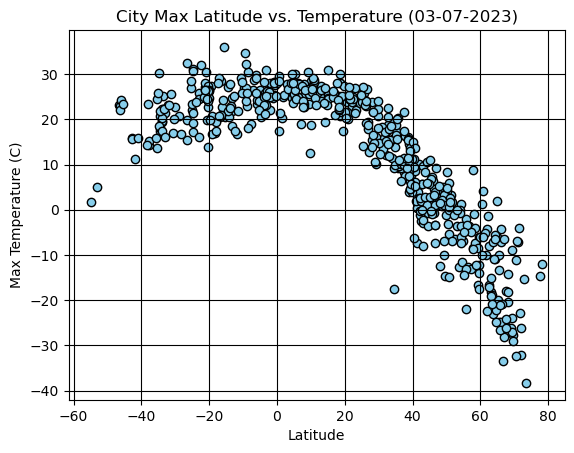

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black",facecolors="skyblue")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (03-07-2023)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid (visible=True,which="major",axis="both",linestyle="-",color="black")

# Save the figure
plt.savefig("Output_Data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

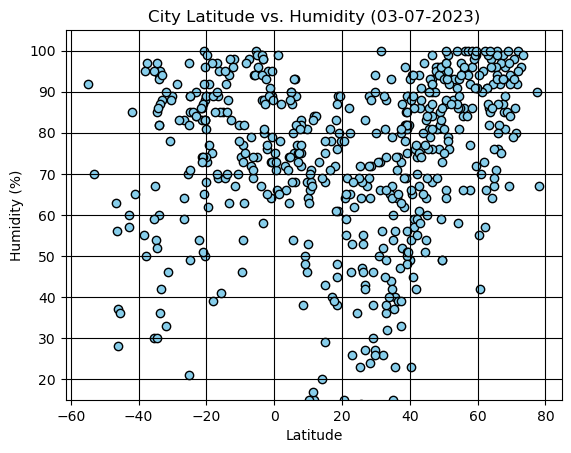

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black",facecolors="skyblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (03-07-2023)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (visible=True,which="major",axis="both",linestyle="-",color="black")

# Save the figure
plt.savefig("Output_Data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

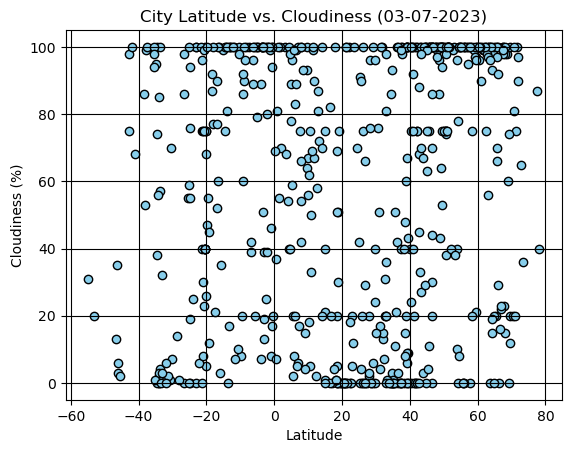

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black",facecolors="skyblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (03-07-2023)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (visible=True,which="major",axis="both",linestyle="-",color="black")

# Save the figure
plt.savefig("Output_Data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

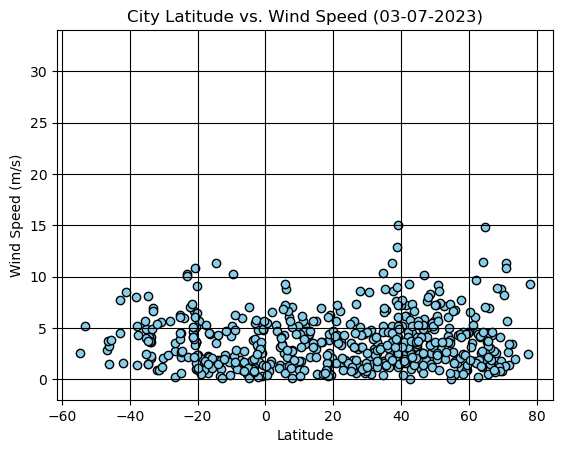

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black",facecolors="skyblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (03-07-2023)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.ylim(-2,34)
plt.grid (visible=True,which="major",axis="both",linestyle="-",color="black")

# Save the figure
plt.savefig("Output_Data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Balkanabat,39.5108,54.3671,7.72,89,9,1.54,TM,1678245371
2,Tiksi,71.6872,128.8694,-22.76,92,100,2.64,RU,1678245097
3,Batagay-Alyta,67.8006,130.4114,-25.97,85,23,0.97,RU,1678245375
4,Albany,42.6001,-73.9662,-2.46,61,68,2.24,US,1678245271
8,Cabo San Lucas,22.8909,-109.9124,23.17,53,20,1.54,MX,1678245381


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Vaini,-21.2000,-175.2000,27.09,74,40,4.63,TO,1678245372
5,Souillac,-20.5167,57.5167,26.21,83,40,3.60,MU,1678245377
6,Mar del Plata,-38.0023,-57.5575,23.38,95,53,1.34,AR,1678245126
7,Rikitea,-23.1203,-134.9692,25.74,84,100,10.26,PF,1678245380
12,Punta Arenas,-53.1500,-70.9167,5.06,70,20,5.14,CL,1678245387


###  Temperature vs. Latitude Linear Regression Plot

The r-value is : -0.9136646153752787


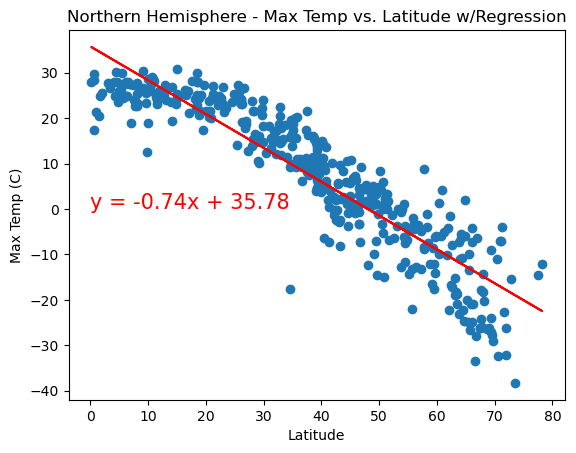

In [15]:
# Linear regression on Northern Hemisphere

equation = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
(slope, intercept, rvalue, pvalue, stderr) = linregress (northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

annotate(equation, 0, 0)

plt.title("Northern Hemisphere - Max Temp vs. Latitude w/Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")

print(f"The r-value is : {rvalue}") 

# Save the figure
plt.savefig("Output_Data/Fig5.png")

The r-value is : 0.4980823148533019


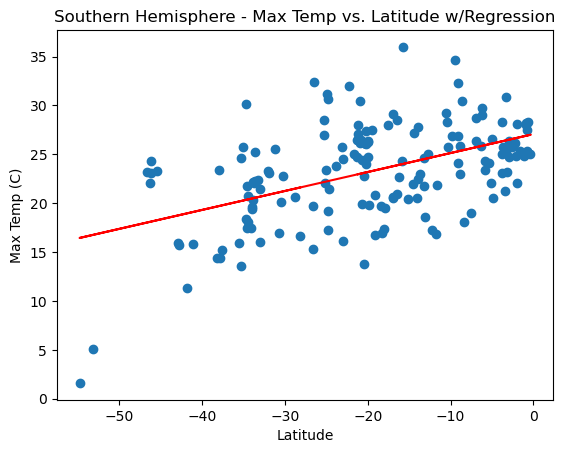

In [16]:
# Linear regression on Southern Hemisphere

equation = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
(slope, intercept, rvalue, pvalue, stderr) = linregress (southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

annotate(equation, -50, 85)

plt.title("Southern Hemisphere - Max Temp vs. Latitude w/Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")

print(f"The r-value is : {rvalue}") 

# Save the figure
plt.savefig("Output_Data/Fig6.png")

The max temperature appears to show a strong negative linear relationship with latitudes in the northern hemisphere, with an r-value of -0.89 for the linear best-fit regression line.

The max temperature appears to show a moderate positive linear relationship with latitudes in the southern hemisphere, with an r-value of 0.47 for the linear best-fit regression line.

### Humidity vs. Latitude Linear Regression Plot

The r-value is : 0.41186844018896307


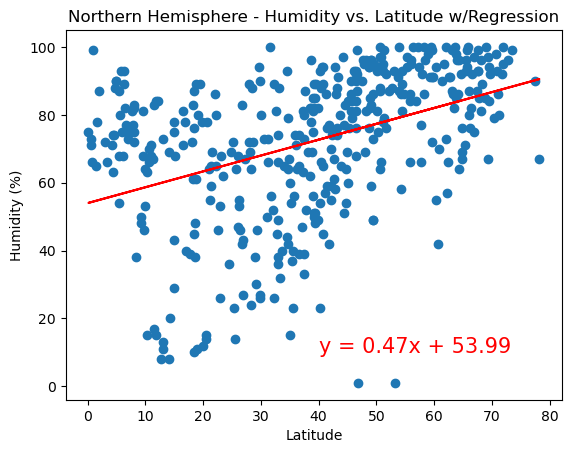

In [17]:
# Northern Hemisphere

equation = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
(slope, intercept, rvalue, pvalue, stderr) = linregress (northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

annotate(equation, 40, 10)

plt.title("Northern Hemisphere - Humidity vs. Latitude w/Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(f"The r-value is : {rvalue}") 

# Save the figure
plt.savefig("Output_Data/Fig7.png")

The r-value is : 0.3211232863872079


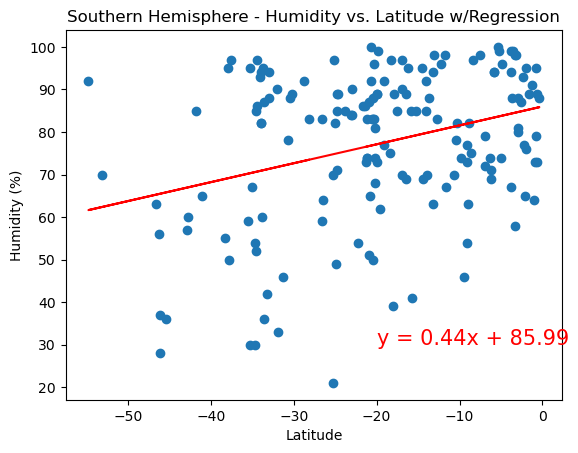

In [18]:
# Southern Hemisphere

equation = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
(slope, intercept, rvalue, pvalue, stderr) = linregress (southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

annotate(equation, -20, 30)

plt.title("Southern Hemisphere - Humidity vs. Latitude w/Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(f"The r-value is : {rvalue}") 

# Save the figure
plt.savefig("Output_Data/Fig8.png")

The humididty appears to show a very weak positive relationship with latitudes in the northern hemisphere, with an r-value of 0.33 for the linear best-fit regression line.

The humidity appears to show a somewhat positive linear relationship with latitudes in the southern hemisphere, with an r-value of 0.47 for the linear best-fit regression line.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is : 0.23539602731636272


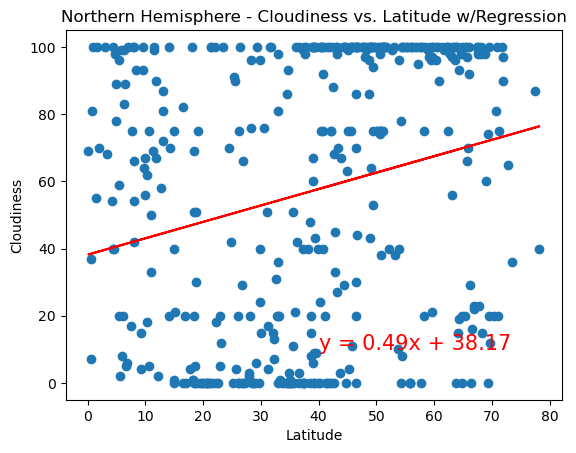

In [19]:
# Northern Hemisphere

equation = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
(slope, intercept, rvalue, pvalue, stderr) = linregress (northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

annotate(equation, 40, 10)

plt.title("Northern Hemisphere - Cloudiness vs. Latitude w/Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r-value is : {rvalue}") 

# Save the figure
plt.savefig("Output_Data/Fig9.png")

The r-value is : 0.28681533450054564


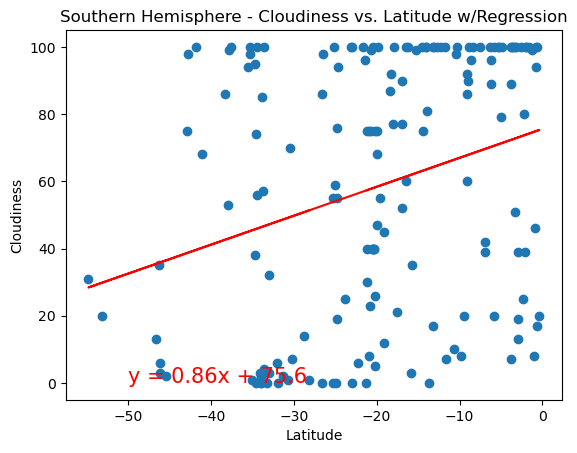

In [20]:
# Southern Hemisphere

equation = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
(slope, intercept, rvalue, pvalue, stderr) = linregress (southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

annotate(equation, -50, 0)

plt.title("Southern Hemisphere - Cloudiness vs. Latitude w/Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r-value is : {rvalue}") 

# Save the figure
plt.savefig("Output_Data/Fig10.png")

The cloudiness appears to show a slightly positive relationship with latitudes in the northern hemisphere, with an r-value of 0.22 for the linear best-fit regression line.

The cloudiness appears to show a slightly positive linear relationship with latitudes in the southern hemisphere, with an r-value of 0.23 for the linear best-fit regression line.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is : 0.0630805704446035


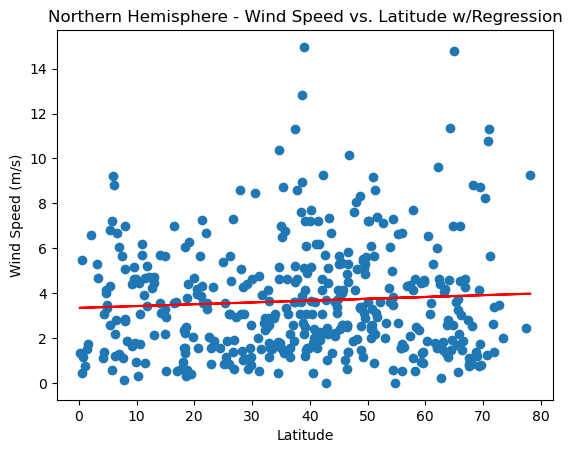

In [21]:
# Northern Hemisphere

equation = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
(slope, intercept, rvalue, pvalue, stderr) = linregress (northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

annotate(equation, 0, 35)

plt.title("Northern Hemisphere - Wind Speed vs. Latitude w/Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

print(f"The r-value is : {rvalue}") 

# Save the figure
plt.savefig("Output_Data/Fig11.png")

The r-value is : -0.2096134638578423


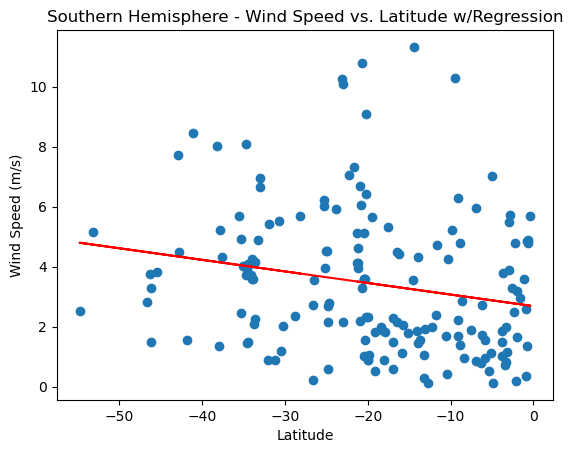

In [22]:
# Southern Hemisphere

equation = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
(slope, intercept, rvalue, pvalue, stderr) = linregress (southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

annotate(equation, 0, 35)

plt.title("Southern Hemisphere - Wind Speed vs. Latitude w/Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

print(f"The r-value is : {rvalue}") 

# Save the figure
plt.savefig("Output_Data/Fig12.png")

The wind speeds appear to show an almost flat relationship with latitudes in the northern hemisphere, with an r-value of 0.08 for the linear best-fit regression line.

The wind speeds appear to show a negative linear relationship with latitudes in the southern hemisphere, with an r-value of -0.31 for the linear best-fit regression line.